# CA2_DP_ML_HDip_Lvl8

# Background

### Dataset Information 

   The NHANES dataset was created to assess the health and nutritional status of adults and children in the
United States. This dataset is funded by the Centers for Disease Control and Prevention (CDC), specifically
through its National Center for Health Statistics (NCHS). The data is based on the survey respondents
throughout the United States. Data was gathered through interviews, physical examinations, and laboratory
tests. For this subset respondents 65 years old and older were labeled as “senior” and all individuals under
65 years old as “non-senior.”

### Task:
   As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and
apply the machine learning models for the specified tasks. Your analysis should aim to identify any
relationships or trends in the data. Recognise suitable independent variables and target variable from the
dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on
your analysis if applicable. You can generate synthetic data or use any additional data to support your
machine learning models if required.


In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')

# Summary of the Dataset 

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [5]:
df.shape

(2278, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


### Missing Values

In [7]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

# About the Dataset 

1. There are 2278 observations and 10 features. 

### Variable Table. 
#### Found it here 
https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

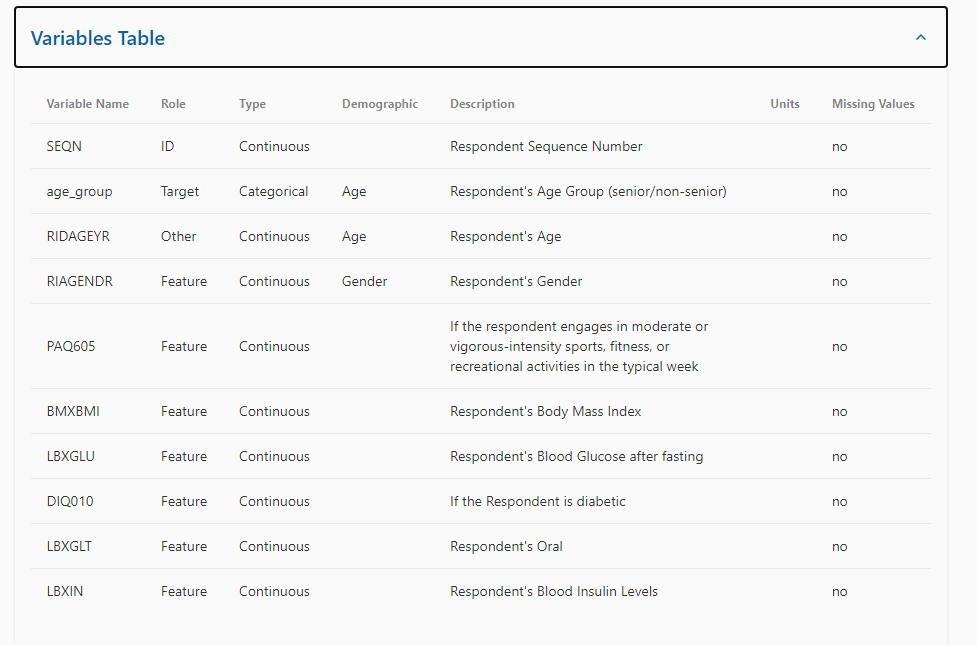



2. There is no missing values. 


# Plot Features Distribution 

#### Import Libraries. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

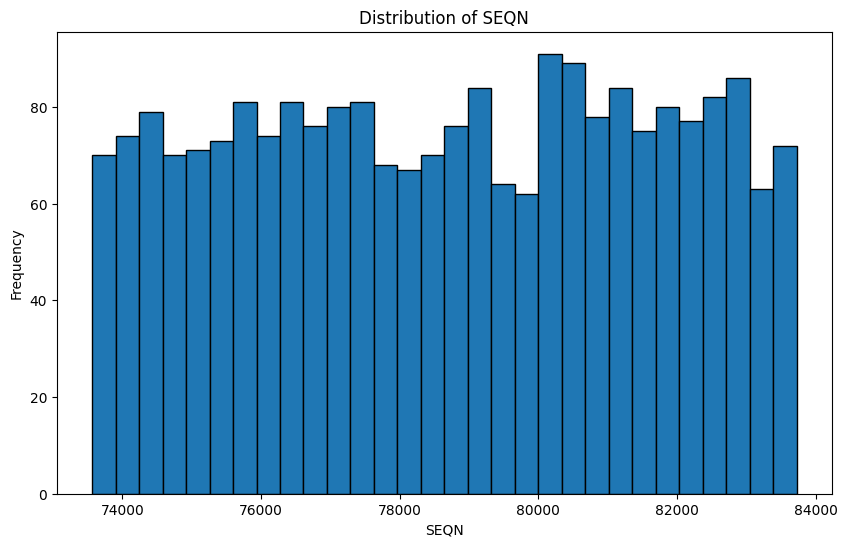

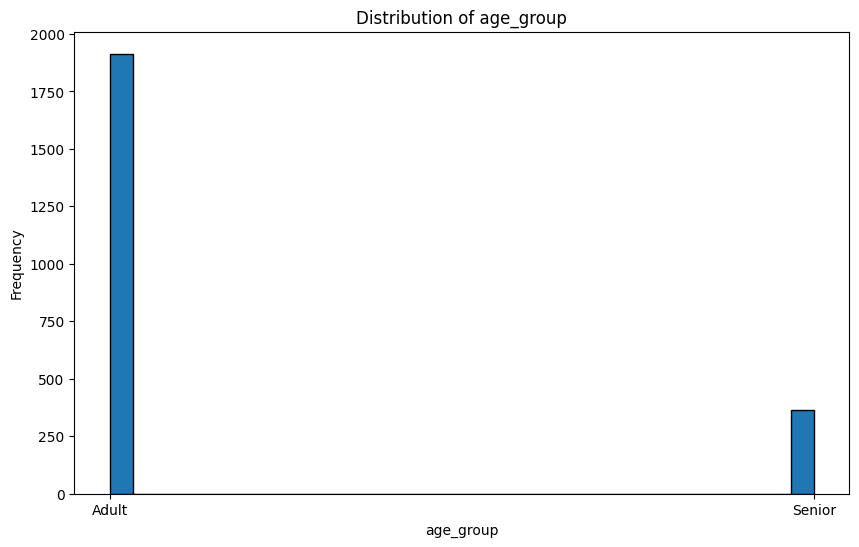

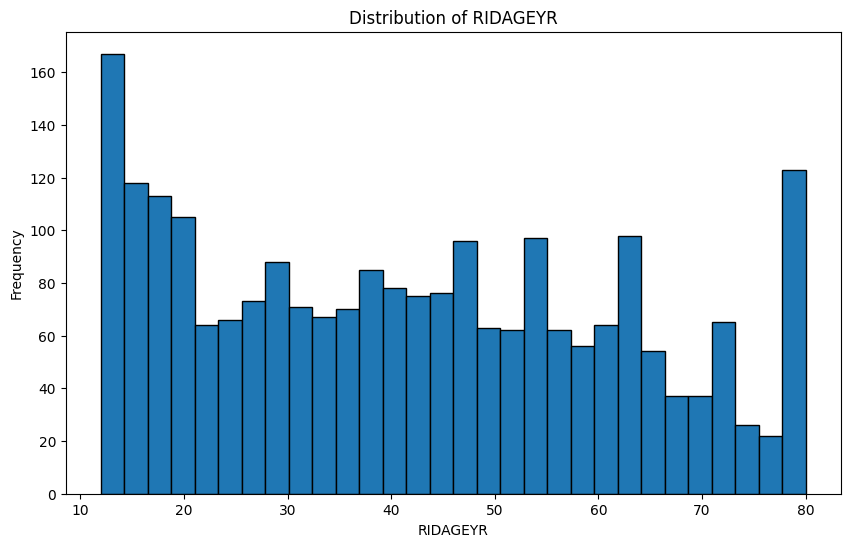

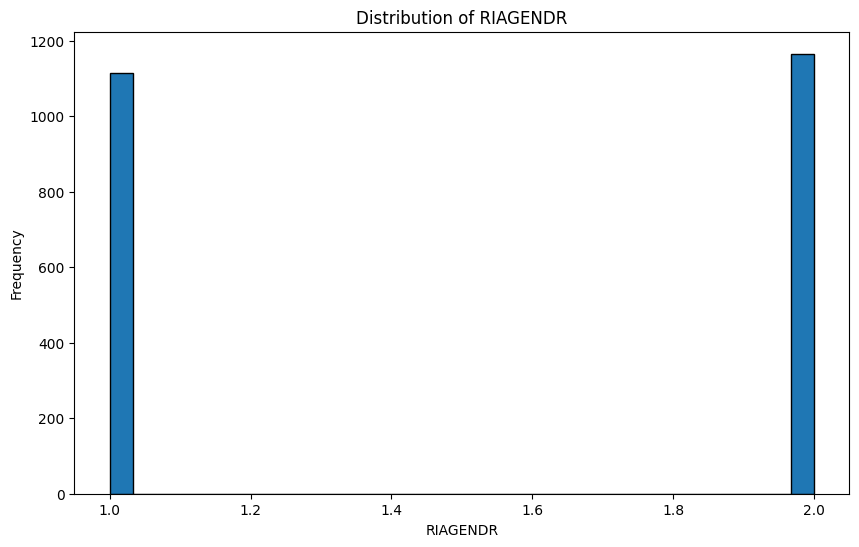

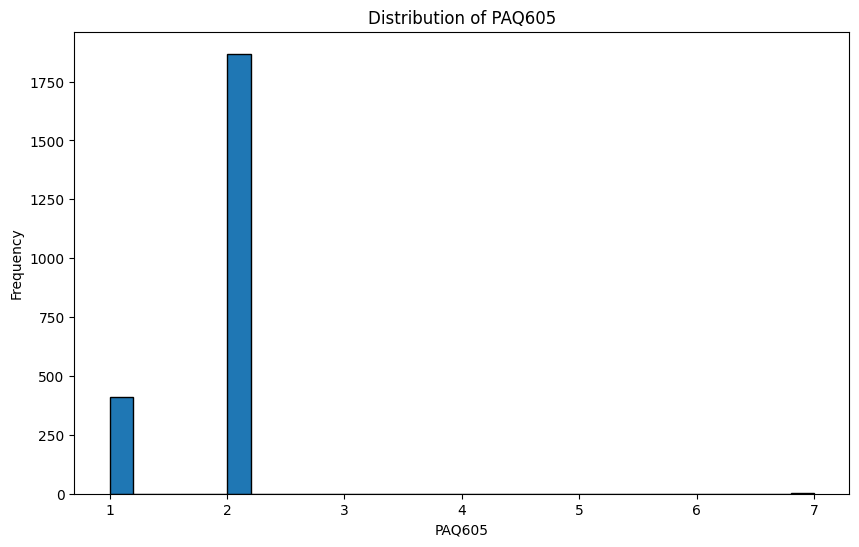

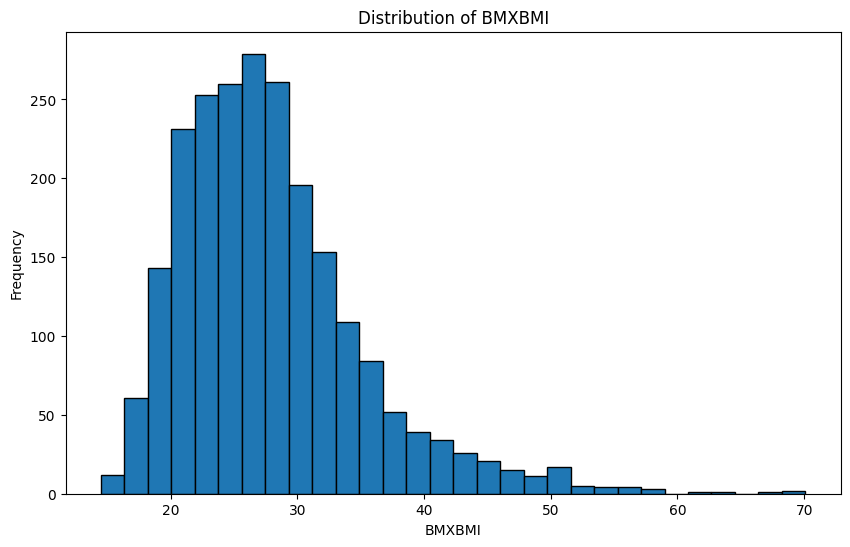

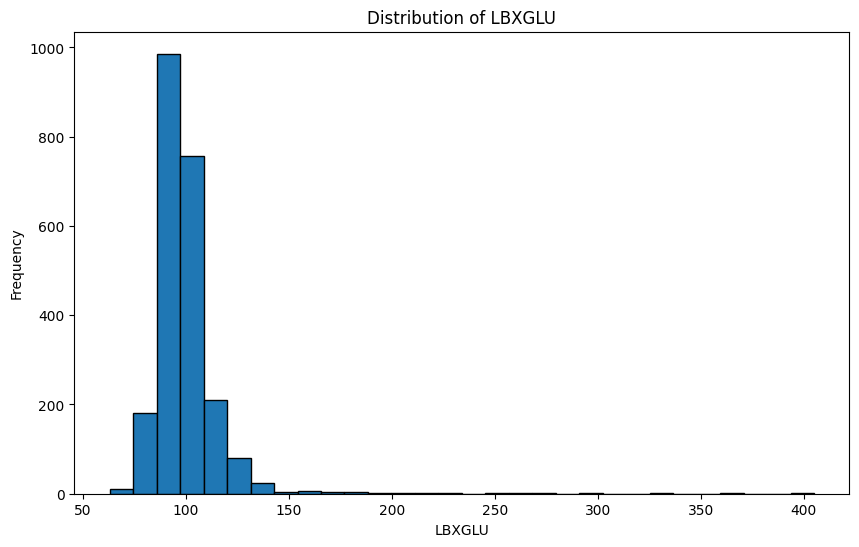

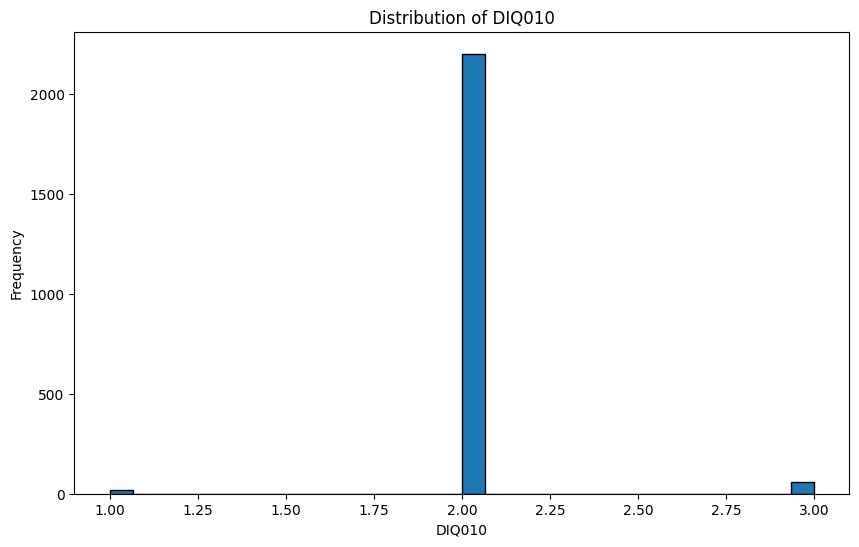

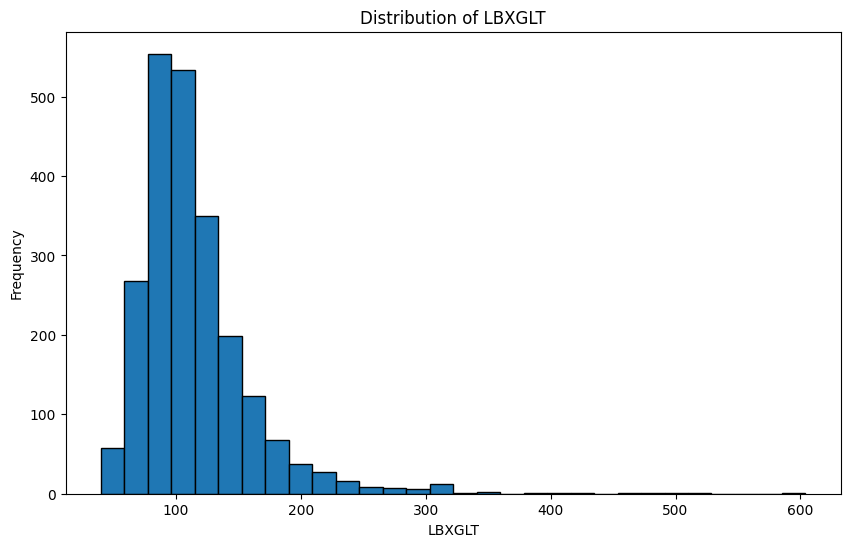

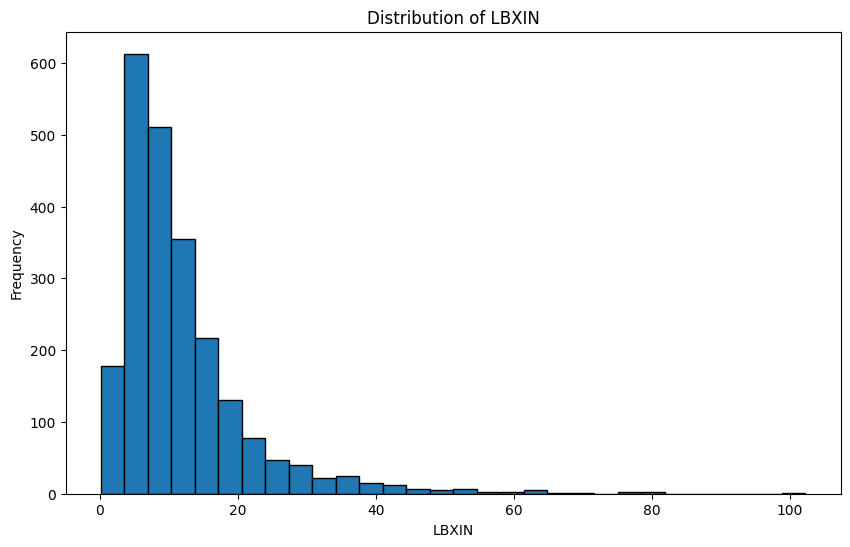

In [9]:
# In order to visualize each column individually I created a loop that says: for column in my dataset plot the histogram and, 
# Also, add title Distribution of with the name of the column. 
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Renaming columns 

   As we have the variable table which describes each feature and the context of the data. To better understanding I will rename the columns to be able to analyze and describe my findings easily. 
   An Example of it is: In the dataset contains a column called RIAGENDR I will replace to Gender. This will not change the context of our data, I am just trying to change the name to understand what the column means. 
   
   BEFORE: RIAGENDR
   AFTER: Gender
   
   BEFORE: RIDAGEYR
   AFTER: Age
   
   

In [10]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [11]:
df.rename(columns={'RIAGENDR': 'Gender', 'RIDAGEYR': 'Age'}, inplace=True)

In [12]:
df.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# EDA


##### Feature Age_group 

1. Using value_counts we can visualize the feature age_group and as we can see there are total of 1914 adult and 364 Senior. 

Important observation here is that we are dealing with a feature which is a unbalanced we have more adult than Senior and also, it is a string. 

##### Plans 

1. I will apply Label enconder as method to replace the text to numbers such as 0 and 1. 
2. the method responsable to create a synthetic data to fix the problem related to unbalanced data is called smote I will be applying it to my age group. 


In [13]:
df.age_group.value_counts(dropna=False)

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
le = LabelEncoder()

In [16]:
df['age_group']= le.fit_transform(df['age_group']) 

In [17]:
df['age_group'].unique() 

array([0, 1])

In [18]:
df.age_group.value_counts(dropna=False)

age_group
0    1914
1     364
Name: count, dtype: int64

### Why did I apply the method label Encoding instead of one-hot Enconding? 

###### It is reasonable choice to use Label Enconding instead of one-hot encoding due to one-hot enconding is more relevant when we are dealing with non-binary feature or when there are more than two values. Important fact is that if I had used one-hot Enconding I would have created more features which could cause the curse of dimensionality. 

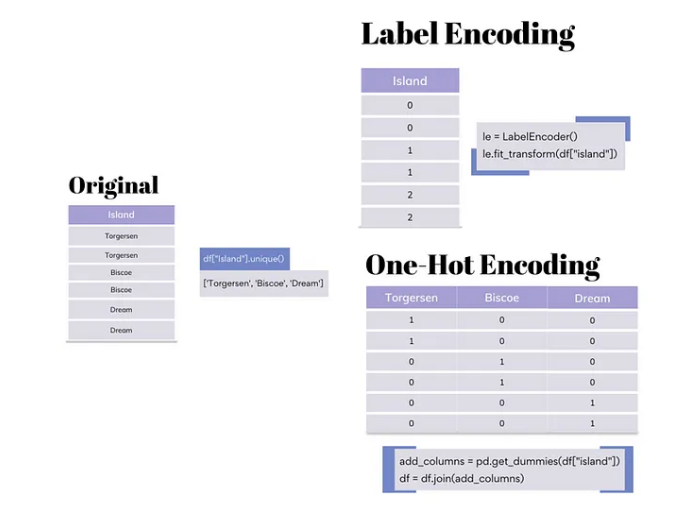

### As age group is our target in order to handle our unbalenced feature we must apply smote in our target, but, before we continue let's visualize our target. 

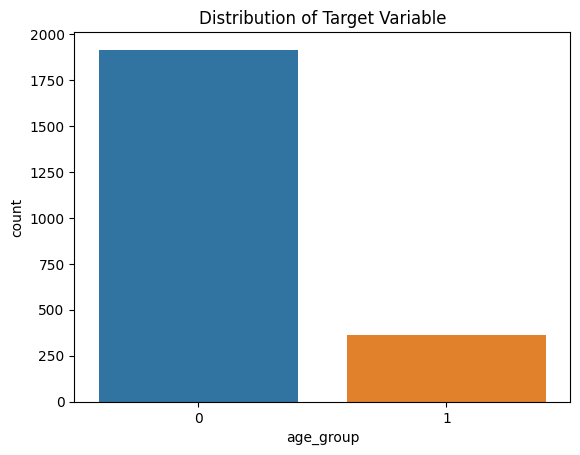

In [19]:
sns.countplot(x='age_group', data=df)
plt.title('Distribution of Target Variable')
plt.show()

###### We can visualize the distribution of our target and say 100% that we have unbalanced data to handle it,  let's apply smote as method. 

In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
X = df.drop(['age_group'], axis=1)  # Features excluding the target
y = df['age_group']  # Numeric encoding of the target

In [22]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

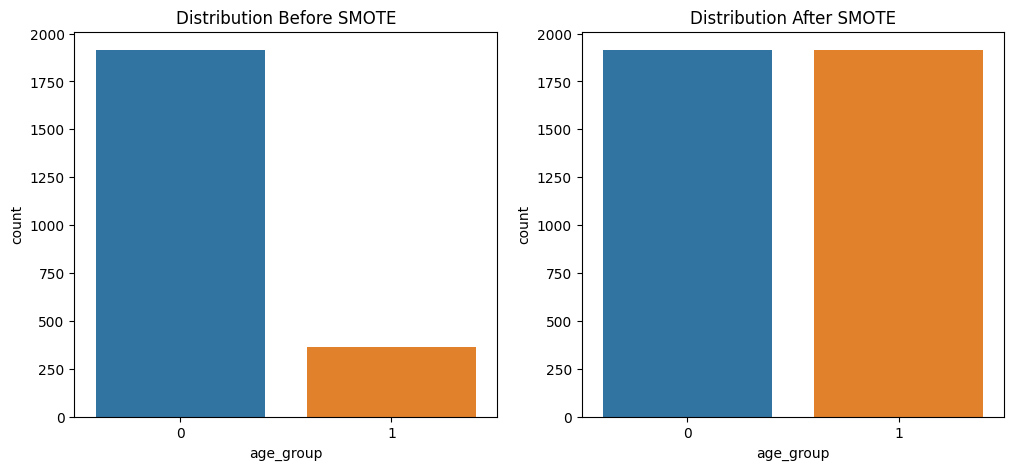

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='age_group', data=df)
plt.title('Distribution Before SMOTE')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution After SMOTE')

plt.show()

In [24]:
df1 = pd.DataFrame(X_resampled, columns=df.columns)

In [25]:
df1['age_group'] = y_resampled


In [26]:
df1.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [27]:
df1.LBXGLU.value_counts(dropna=False)

LBXGLU
94.000000     124
96.000000     121
99.000000     112
95.000000     106
100.000000    103
             ... 
84.022325       1
83.105370       1
114.132111      1
109.454499      1
95.183385       1
Name: count, Length: 1604, dtype: int64

In [28]:
df1.age_group.value_counts(dropna=False)

age_group
0    1914
1    1914
Name: count, dtype: int64

# After applying smote is clearly that our target is no longer unbalanced.


In [29]:
df.head()

,SEQN,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [30]:
numeric_columns = df1.select_dtypes(include='number').columns


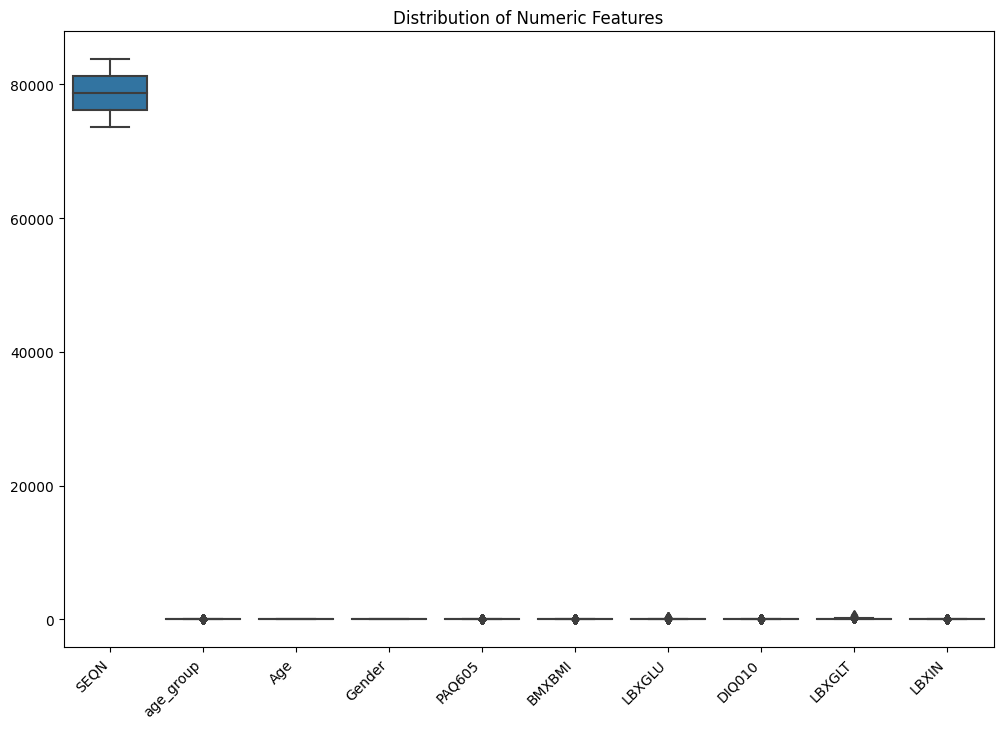

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Distribution of Numeric Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# This boxplot shows us that we have the most of features in the same scale except SEQN. 
#### Looking deeply in our data dictionary we assume that SEQN is not imporant for our analysis due to is a ID for each Respondent. As our feature is a ID it means that is only a feature to identify the Respondent we can drop it, because, It will not have affect in our model. 

In [32]:
df2 = df1.drop(columns='SEQN')


In [33]:
df2.head()

,age_group,Age,Gender,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# Outliers

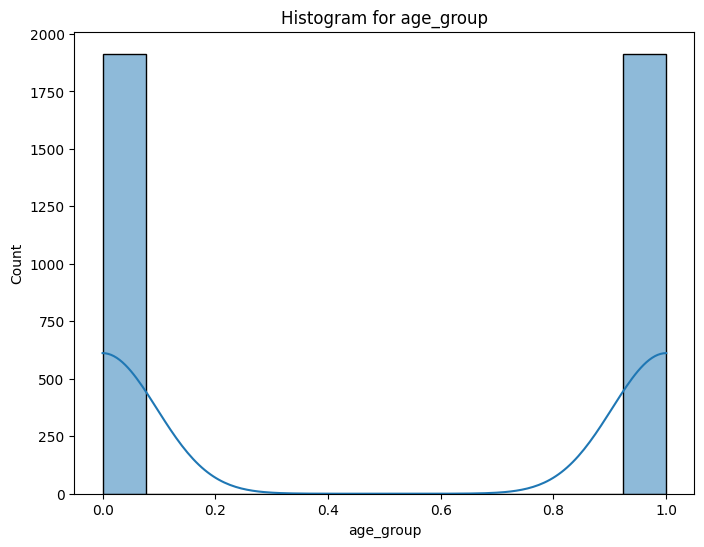

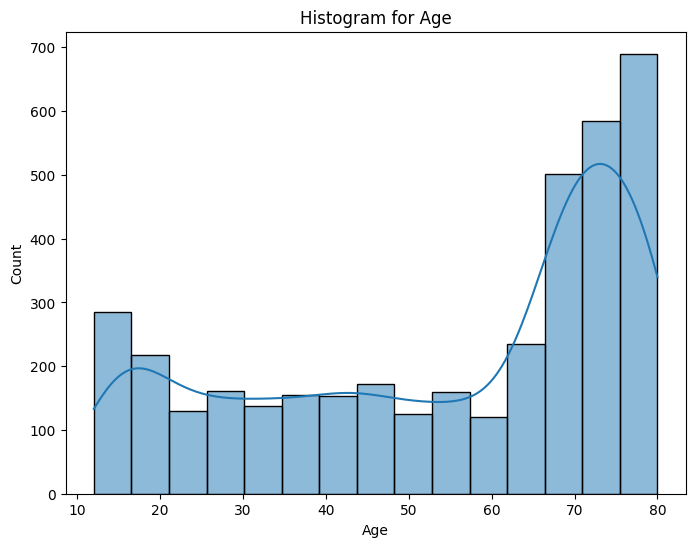

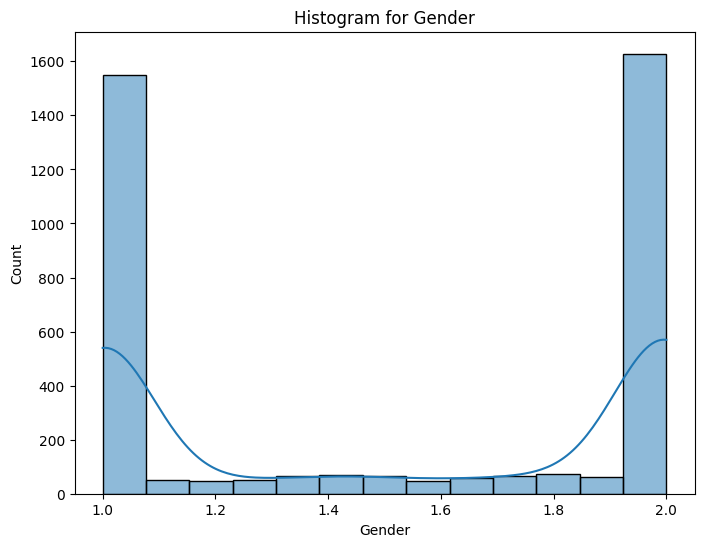

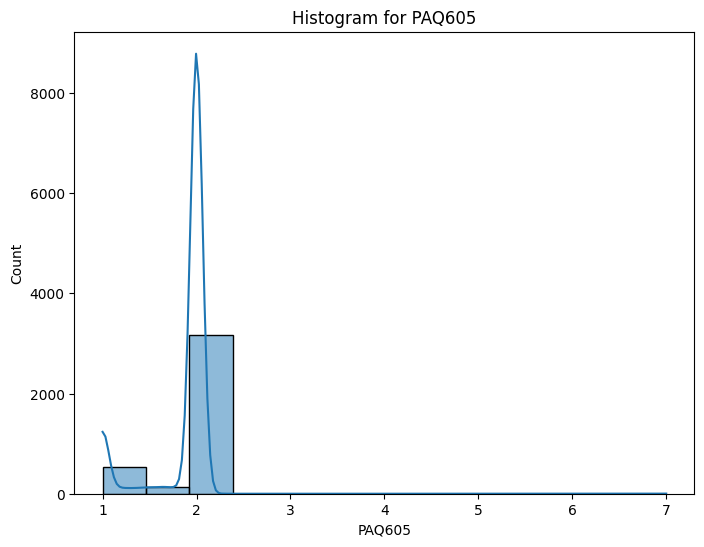

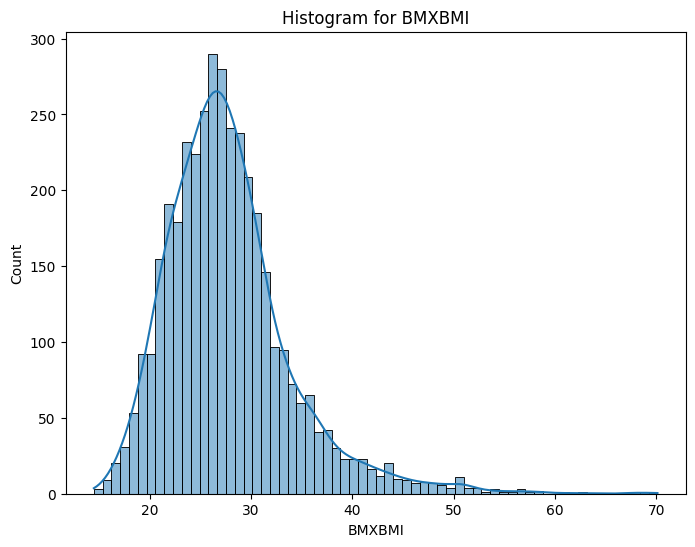

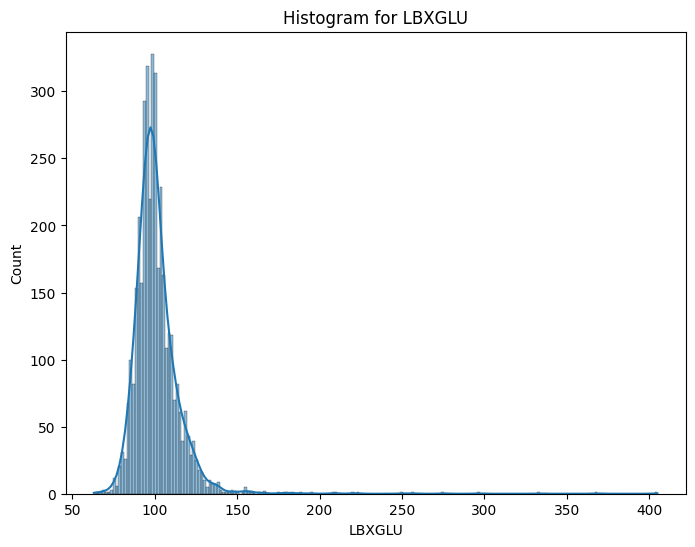

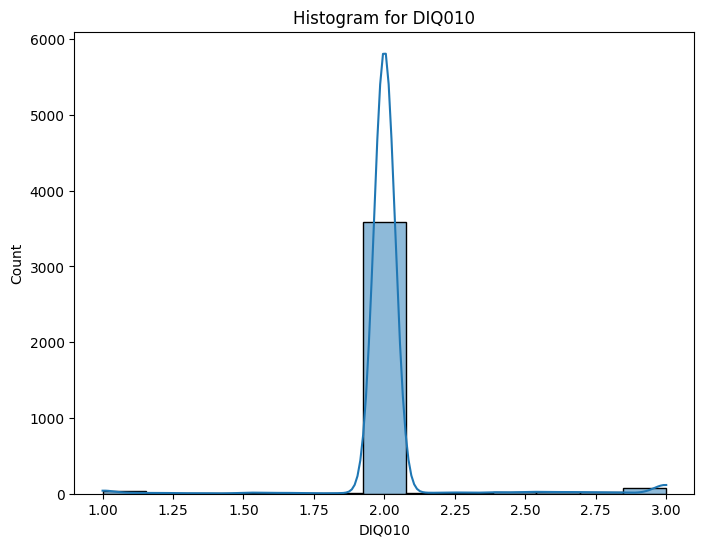

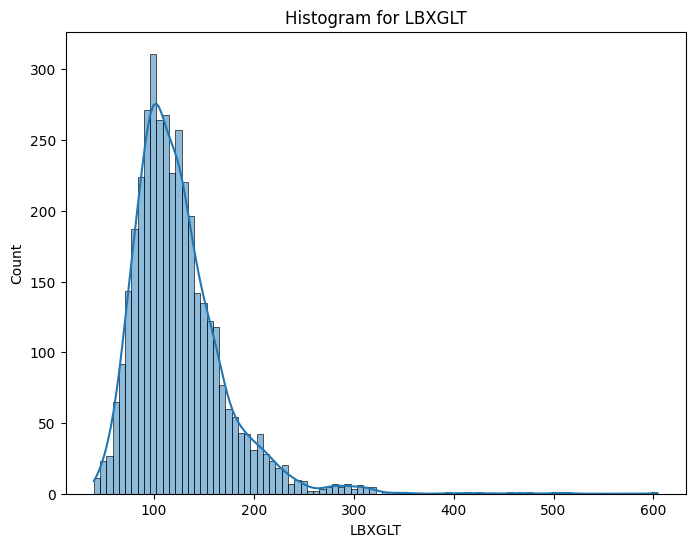

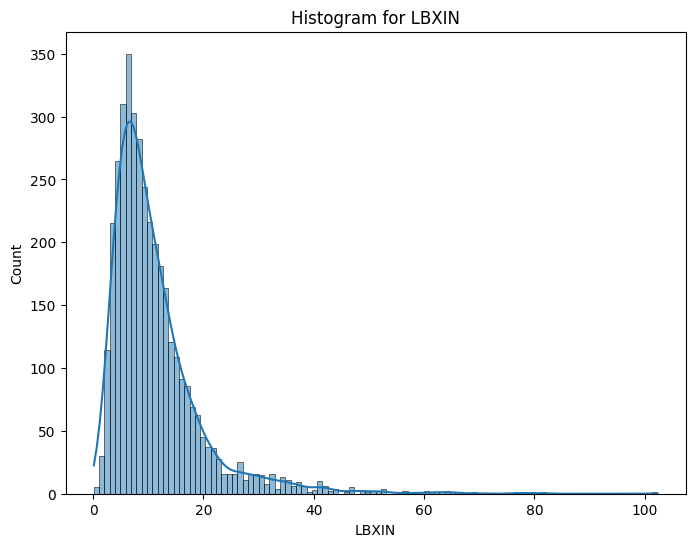

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a loop to visualize each column individually. 

for column in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

#### Using Histogram to visualize each column we can say that there are outliers and some columns, however, we are not subject matter to say what to do with the outliers, we are going to keep them. 

# The difference LDA and PCA


#### PCA ( Principal component Analysis) 

1. PCA is a Unsupervised method that try to find the directions of variance in the data. 
2. PCA does not consider class labels during the dimensionality reduction. 
3. PCA transform the data to a new set of variables keeping as much as possible of variance. 


#### LDA. 

1. Different of PCA, LDA try to takes into account the class labels during the process of dimensionality reduction. 
2. LDA is a supervised method. 
3. LDA increase the separation between classes. 


In a general is better if you try to apply both methods and plot it and see which one fits in your dataset. 

I will apply both methods and make a decision about which one I will use depending of the results collects. 


##### First Step Scaler the X

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
X = df2.drop(columns='age_group')
y = df2['age_group']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[ 0.29077247,  1.04592552,  0.41463915, ..., -0.09692327,
         0.56269321,  0.43602648],
       [-1.2917491 ,  1.04592552,  0.41463915, ..., -0.09692327,
        -0.96718678, -0.86659597],
       [-1.74389812, -1.10524454,  0.41463915, ..., -0.09692327,
        -1.22945192, -0.59688481],
       ...,
       [ 1.14985561,  1.04592552,  0.41463915, ..., -0.09692327,
        -0.76307456, -0.59662548],
       [ 0.51182604,  1.04592552,  0.41463915, ..., -0.09692327,
        -0.90534269, -0.77718851],
       [ 0.71534899,  1.04592552,  0.41463915, ..., -0.09692327,
        -0.00498778,  0.34045991]])

# Second step Appling PCA

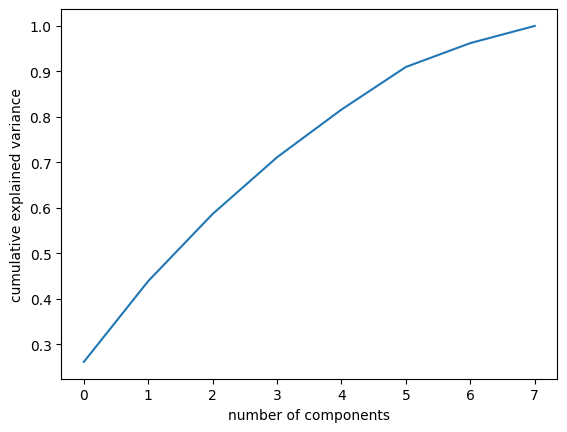

In [39]:
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

# To be able to get almost 100% we need to use 6 or 7 components. 

In [40]:
pca = PCA(6)
projected = pca.fit_transform(X_scaled)


In [41]:
projected.shape

(3828, 6)

In [42]:
X_pca = pd.DataFrame(projected)

In [43]:
X_pca['age_group'] = df2['age_group']


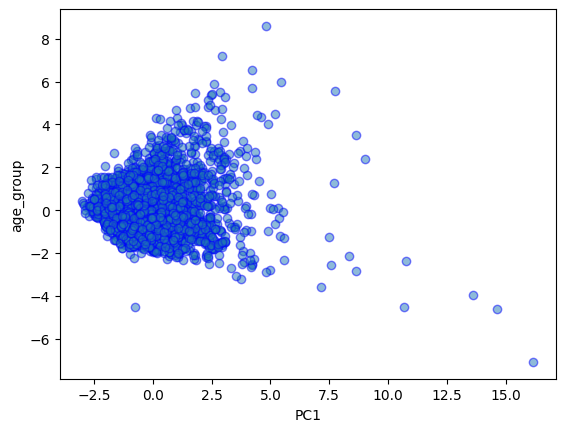

In [44]:
plt.xlabel('PC1')
plt.ylabel('age_group') 

plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], alpha=0.5, edgecolors='b') 

plt.show()

In [45]:
X_pca.head()

,0,1,2,3,4,5,age_group
0,1.308651,0.294742,1.281404,0.027885,-0.379080,0.021047,0
1,-2.196424,-0.136730,0.682380,-0.105491,0.089599,1.145901,0
2,-2.037028,0.618877,-0.774445,-0.144722,1.405245,0.396383,0
3,-0.299132,1.087432,-0.543245,-0.084691,1.356919,-0.027048,0
4,-0.299037,1.859724,-0.359284,0.879940,-2.187049,0.233628,0


# LDA 

In [46]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [47]:
X_lda1 = lda.fit_transform(X_scaled, y)


In [48]:
lda_df = pd.DataFrame(data=X_lda1, columns=['LDA Component 1'])
lda_df['age_group'] = y

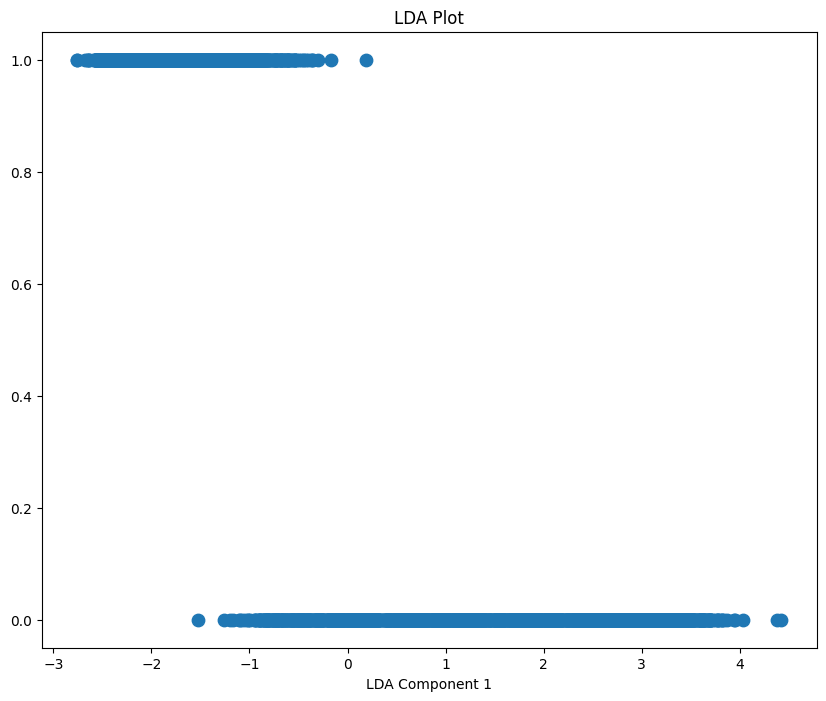

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(x=lda_df['LDA Component 1'], y=lda_df['age_group'], s=80)
plt.title('LDA Plot')
plt.xlabel('LDA Component 1')
plt.show()


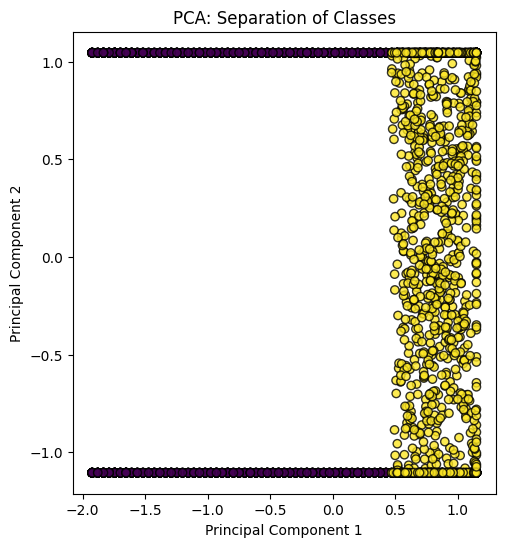

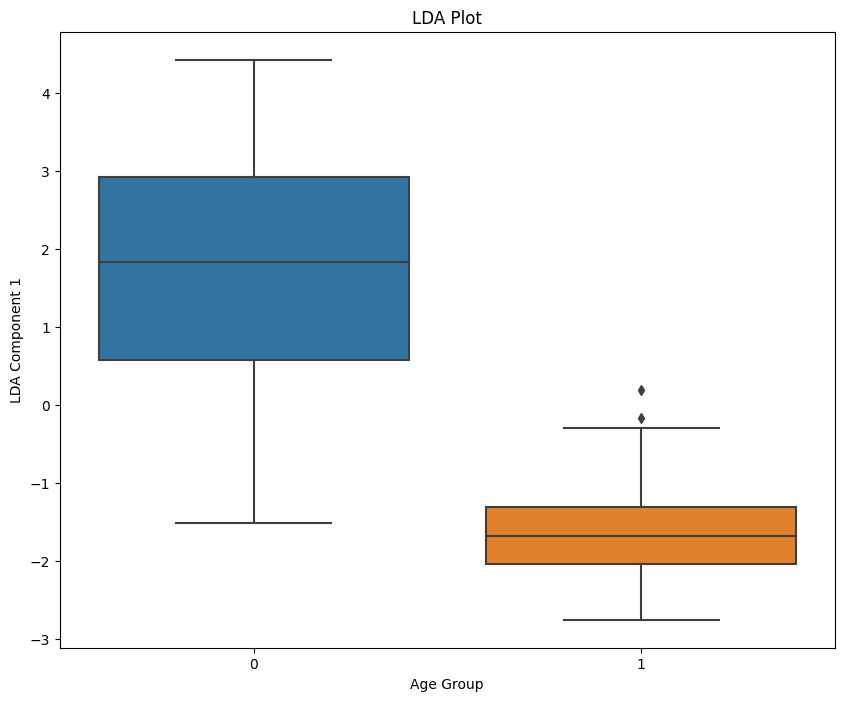

In [50]:
# Compare both 
plt.figure(figsize=(12, 6))

# PCA Visualization
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA: Separation of Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# LDA Visualization

plt.figure(figsize=(10, 8))
sns.boxplot(x='age_group', y='LDA Component 1', data=lda_df)
plt.title('LDA Plot')
plt.xlabel('Age Group')
plt.ylabel('LDA Component 1')
plt.show()



# Machine Learning, 

1. Applying Machine Learning Algorithm with PCA. 
2. Applying Machine Learning Algorithm with LDA
3. Applying Machine Learning Algorithm without any of these methods. 


##### WITH PCA


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
def apply_ml_algorithms(X_pca):
    
    # Split the data into features (X) and target variable (y)
    X = X_pca.drop('age_group', axis=1)
    y = X_pca['age_group']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    algorithms = {
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    for name, model in algorithms.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Print the results
        print(f"{name} Accuracy: {accuracy:.2f}")



In [60]:
apply_ml_algorithms(X_pca)

Random Forest Accuracy: 0.96
Support Vector Machine Accuracy: 0.96
K-Nearest Neighbors Accuracy: 0.95
Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.94
Naive Bayes Accuracy: 0.84


# With LDA. 

In [61]:
def apply_ml_algorithms1(lda_df):
    
    # Split the data into features (X) and target variable (y)
    X = lda_df.drop('age_group', axis=1)
    y = lda_df['age_group']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    algorithms = {
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB()
    }
    # Iterate over each algorithm
    for name, model in algorithms.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Print the results
        print(f"{name} Accuracy: {accuracy:.2f}")



In [62]:
apply_ml_algorithms1(lda_df)

Random Forest Accuracy: 0.96
Support Vector Machine Accuracy: 0.97
K-Nearest Neighbors Accuracy: 0.97
Logistic Regression Accuracy: 0.97
Decision Tree Accuracy: 0.96
Naive Bayes Accuracy: 0.97


# Without any of these methods. 



In [63]:
def apply_ml_algorithms2(df2):
    
    # Split the data into features (X) and target variable (y)
    X = df2.drop('age_group', axis=1)
    y = df2['age_group']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    algorithms = {
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB()
    }
    # Iterate over each algorithm
    for name, model in algorithms.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Print the results
        print(f"{name} Accuracy: {accuracy:.2f}")



In [64]:
apply_ml_algorithms1(df2)

Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.98
K-Nearest Neighbors Accuracy: 0.98
Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 1.00
Naive Bayes Accuracy: 0.95
